In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import pylab as p
import matplotlib.pyplot as plt
from collections import Counter
import re
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [37]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Traffic/train_2.csv')

In [38]:
print(df.head())

                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2017-09-01  2017-09-02  2017-09-03  

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 804 entries, Page to 2017-09-10
dtypes: float64(803), object(1)
memory usage: 889.8+ MB
None


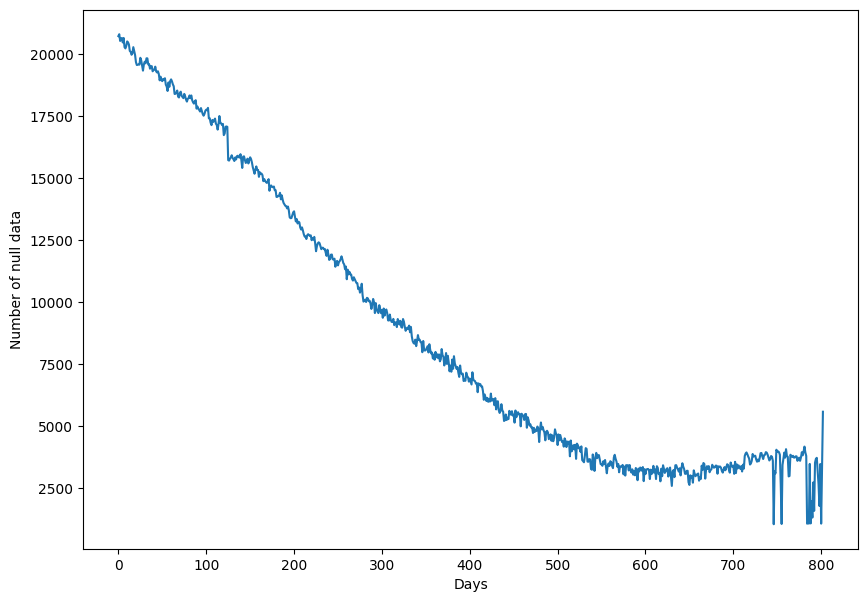

In [40]:
days = [r for r in range(df.shape[1] - 1)]
fig, ax = plt.subplots(figsize = (10,7))
plt.xlabel('Days')
plt.ylabel('Number of null data')
plt.plot(days, df.iloc[:,1:].isnull().sum())

<Axes: >

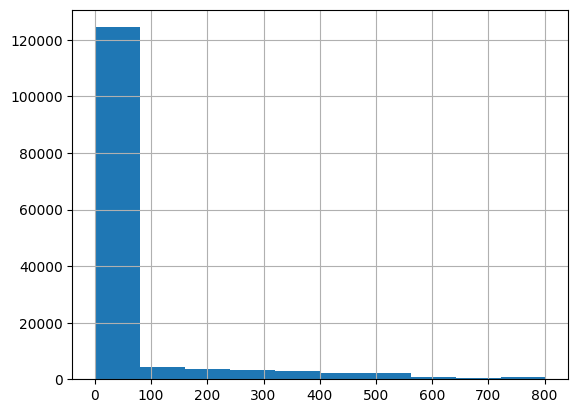

In [41]:
df.isnull().sum(axis = 1).hist()

In [42]:
df = df.fillna(0)

In [43]:
def lang(Page):
    val = re.search('[a-z][a-z].wikipedia.org',Page)
    if val:
        return val[0][0:2]


    return 'no_lang'

df['language'] = df.Page.map(lang)

In [44]:
print("\nArticle count as per Language : \n", Counter(df.language))


Article count as per Language : 
 Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'no_lang': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [45]:
language_collection = {}
language_collection['en'] = df[df.language == 'en'].iloc[:, 0:-1]
language_collection['ja'] = df[df.language == 'ja'].iloc[:, 0:-1]
language_collection['de'] = df[df.language == 'de'].iloc[:, 0:-1]
language_collection['fr'] = df[df.language == 'fr'].iloc[:, 0:-1]
language_collection['zh'] = df[df.language == 'zh'].iloc[:, 0:-1]
language_collection['ru'] = df[df.language == 'ru'].iloc[:, 0:-1]
language_collection['es'] = df[df.language == 'es'].iloc[:, 0:-1]
language_collection['no_lang'] = df[df.language == 'no_lang'].iloc[:, 0:-1]

for key in language_collection:
    print("KEY : ", language_collection[key],"\n")

KEY :                                                       Page  2015-07-01  \
8357            !vote_en.wikipedia.org_desktop_all-agents         3.0   
8358    "Awaken,_My_Love!"_en.wikipedia.org_desktop_al...         0.0   
8359    "European_Society_for_Clinical_Investigation"_...         0.0   
8360    "Weird_Al"_Yankovic_en.wikipedia.org_desktop_a...      2403.0   
8361       100_metres_en.wikipedia.org_desktop_all-agents       982.0   
...                                                   ...         ...   
113946  Zikanyrops_sparsa_en.wikipedia.org_all-access_...         1.0   
113947  Zillur_Rahman_John_en.wikipedia.org_all-access...         7.0   
113948   Zitadelle_en.wikipedia.org_all-access_all-agents        10.0   
113949  Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...         0.0   
113950  Zurich.minds_en.wikipedia.org_all-access_all-a...         8.0   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
8357           4.0         7.0         4.0    

In [46]:
total_view = {}
for key in language_collection:
    total_view[key] = language_collection[key].iloc[:, 1:].sum(axis=0) / language_collection[key].shape[0]


for key in language_collection:
    print("KEY : ", key)
    print("\nTotal_Value KEY : \n", total_view[key])

KEY :  en

Total_Value KEY : 
 2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
                 ...     
2017-09-06    3851.955119
2017-09-07    4052.678488
2017-09-08    3086.851958
2017-09-09    2983.228099
2017-09-10    3126.377344
Length: 803, dtype: float64
KEY :  ja

Total_Value KEY : 
 2015-07-01    580.647056
2015-07-02    666.672801
2015-07-03    602.289805
2015-07-04    756.509177
2015-07-05    725.720914
                 ...    
2017-09-06    572.449856
2017-09-07    634.495277
2017-09-08    572.227253
2017-09-09    611.708825
2017-09-10    682.201361
Length: 803, dtype: float64
KEY :  de

Total_Value KEY : 
 2015-07-01    714.968405
2015-07-02    705.229741
2015-07-03    676.877231
2015-07-04    621.145145
2015-07-05    722.076185
                 ...    
2017-09-06    667.134793
2017-09-07    768.744110
2017-09-08    631.135979
2017-09-09    587.832803
2017-09-10    656.901062
Length: 803, dt

In [47]:
def split_page(page):
  w = re.split('_|\.', page)
  return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

li = list(df['Page'].apply(split_page))
df2 = pd.DataFrame(li)
df2.columns = ['Title', 'Language', 'Access_type','Access_origin']
df = pd.concat([df, df2], axis = 1)
del df['Page']

In [48]:
df.iloc[:, -4:]

,Title,Language,Access_type,Access_origin
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
4,52 Hz I Love You,zh,all-access,spider
...,...,...,...,...
145058,Underworld (serie de películas),es,all-access,spider
145059,Resident Evil: Capítulo Final,es,all-access,spider
145060,Enamorándome de Ramón,es,all-access,spider
145061,Hasta el último hombre,es,all-access,spider


<Axes: >

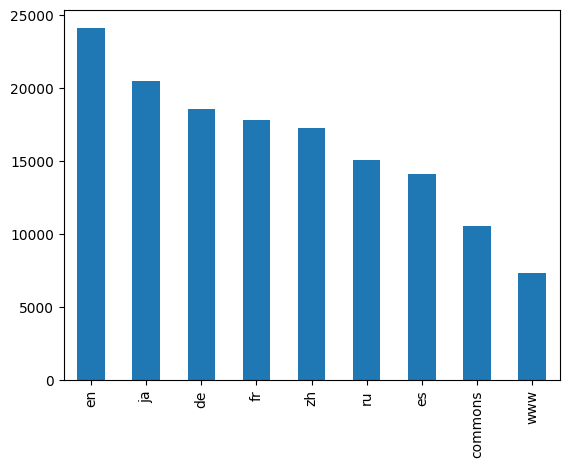

In [49]:
df.Language.value_counts().plot(kind = 'bar')

<Axes: >

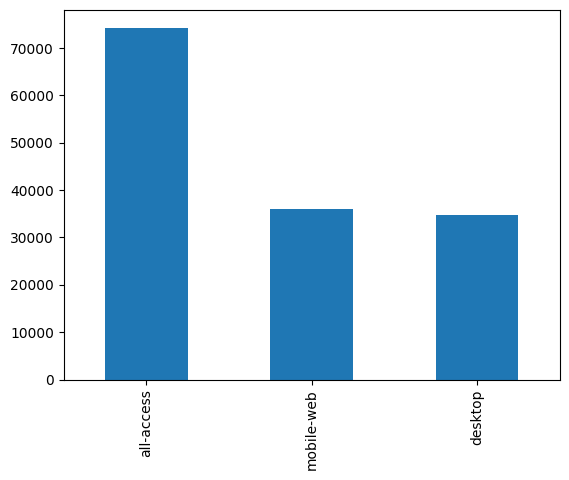

In [50]:
df.Access_type.value_counts().plot(kind = 'bar')

<Axes: >

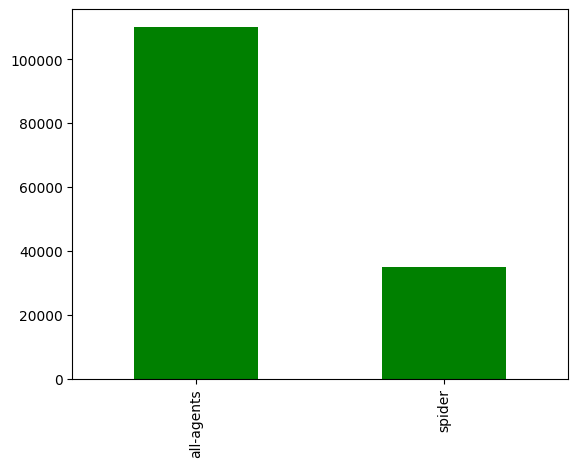

In [51]:
df.Access_origin.value_counts().plot(kind = 'bar', color = 'green')

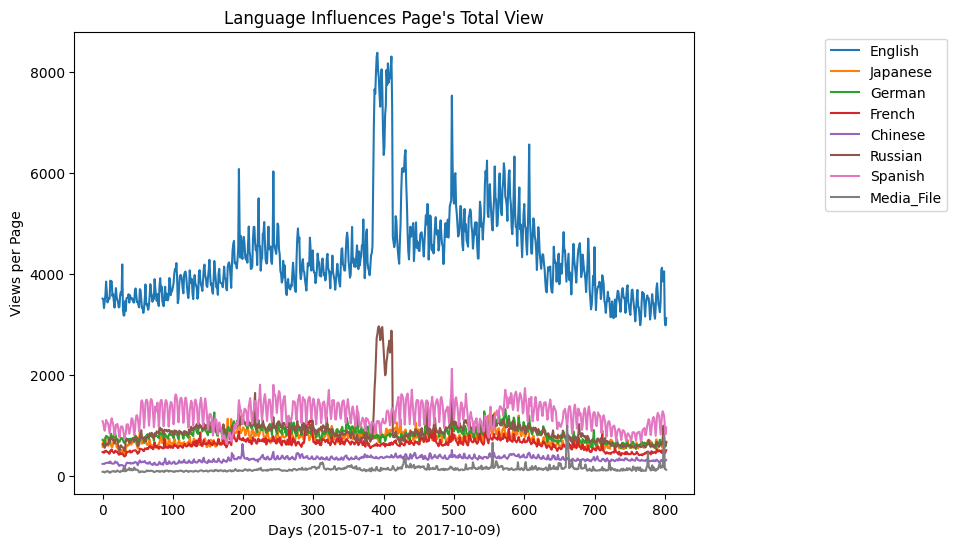

In [52]:
days = [r for r in range(total_view['en'].shape[0])]

plt.figure(figsize=(8, 6))
labels={'ja':'Japanese','de':'German','en' : 'English','no_lang':'Media_File','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'}

for key in total_view:
    plt.plot(days,total_view[key],label = labels[key])


plt.ylabel('Views per Page')
plt.xlabel('Days (2015-07-1  to  2017-10-09)')
plt.title('Language Influences Page\'s Total View')
plt.legend(loc = 'upper left', bbox_to_anchor = (1.2, 1))
plt.show()

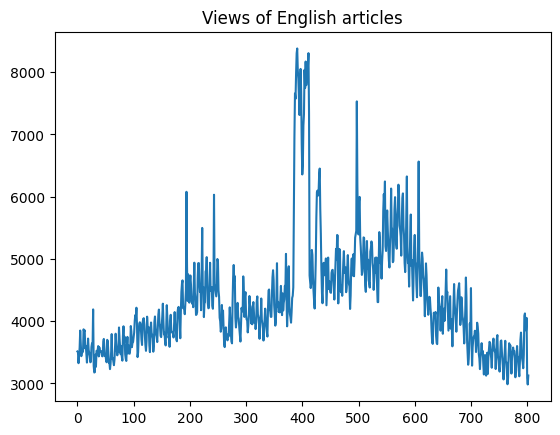

In [53]:
plt.plot(days,total_view['en'],label=labels['en'])
plt.title('Views of English articles')
plt.show()

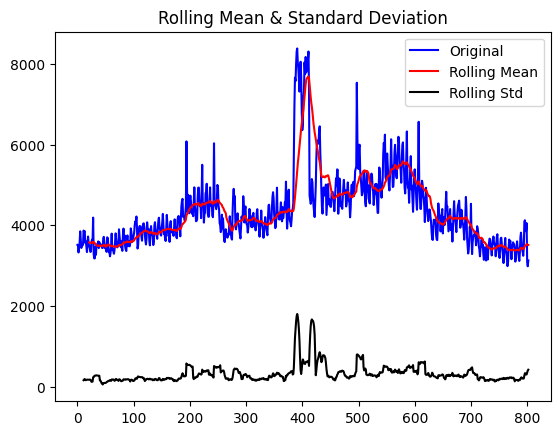

ADF Stastistic: -2.806398
p-value: 0.057366
The graph is non stationery
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [54]:
def stationary_test(x):

    rolling_mean = x.rolling(window=22,center=False).mean()

    rolling_std = x.rolling(window=12,center=False).std()

    orig = plt.plot(x.values, color='blue',label='Original')
    mean = plt.plot(rolling_mean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key, value))

stationary_test(total_view['en'])

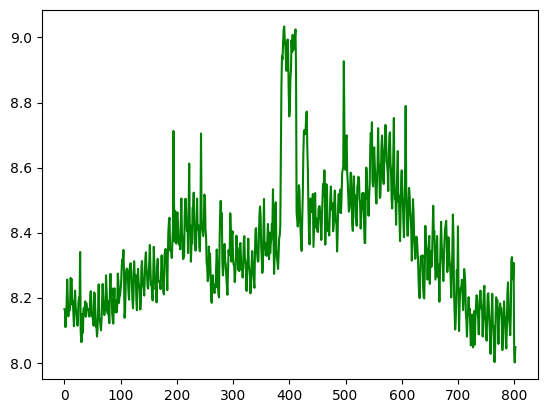

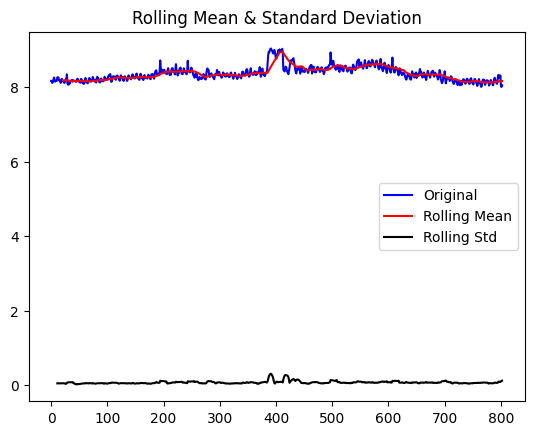

ADF Stastistic: -2.239693
p-value: 0.192156
The graph is non stationery
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [55]:
log_transform = np.log(total_view['en'])
plt.plot(log_transform.values,color="green")
plt.show()

stationary_test(log_transform)

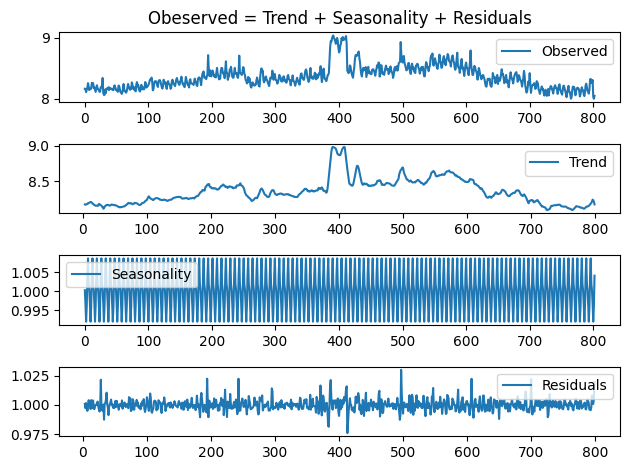

In [56]:
decomp = seasonal_decompose(log_transform.values, model='multiplicative', period = 7)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid


plt.subplot(411)
plt.title('Obeserved = Trend + Seasonality + Residuals')
plt.plot(log_transform.values,label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [57]:
log_transform_decompose = residual
#log_transform_decompose.fillna(inplace=True)
#stationary_test(log_transform_decompose)

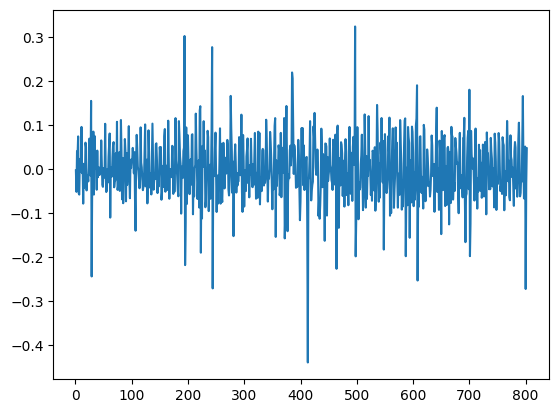

In [58]:
log_transform_diff = log_transform - log_transform.shift()
plt.plot(log_transform_diff.values)
plt.show()

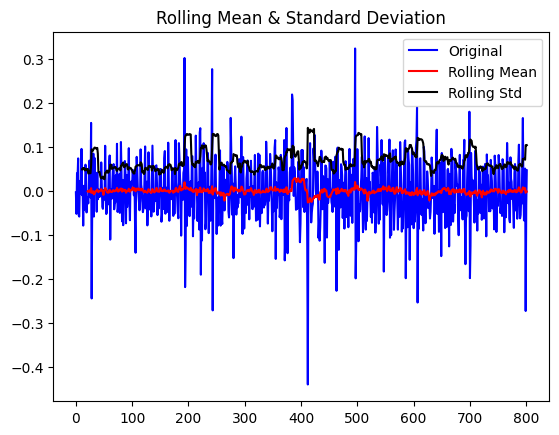

ADF Stastistic: -5.820977
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [59]:
log_transform_diff.dropna(inplace=True)
stationary_test(log_transform_diff)

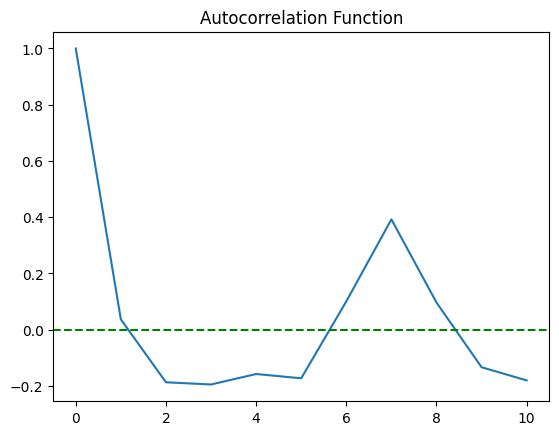

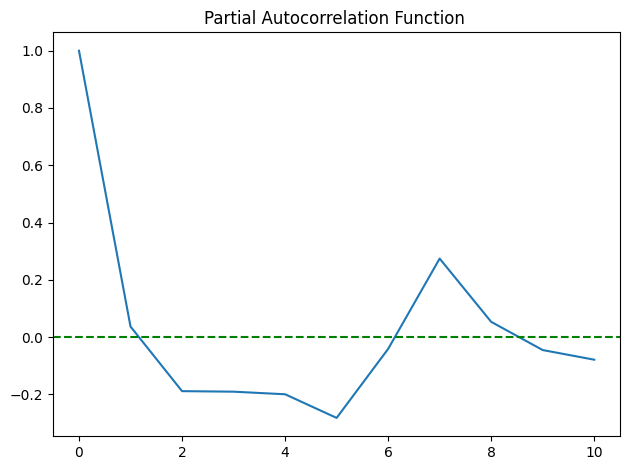

In [60]:
lag_acf = acf(log_transform_diff, nlags=10)
lag_pacf = pacf(log_transform_diff, nlags=10, method='ols')

plt.subplot(1,1,1)

plt.plot(lag_acf)

plt.axhline(y=0,linestyle='--',color='g')
plt.title('Autocorrelation Function')
plt.show()


plt.subplot(1,1,1)
plt.plot(lag_pacf)

plt.axhline(y=0,linestyle='--',color='green')
plt.title('Partial Autocorrelation Function ')
plt.tight_layout()
plt.show()

In [61]:
model = ARIMA(log_transform.values, order=(1,1,1))
results_ARIMA = model.fit()

In [62]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  803
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1024.007
Date:                Fri, 01 Dec 2023   AIC                          -2042.014
Time:                        08:57:37   BIC                          -2027.953
Sample:                             0   HQIC                         -2036.613
                                - 803                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7245      0.033     22.054      0.000       0.660       0.789
ma.L1         -0.9126      0.022    -41.699      0.000      -0.955      -0.870
sigma2         0.0046      0.000     32.600      0.0

In [63]:
size = int(len(log_transform)-100)
df_arima, test_arima = log_transform[0:size], log_transform[size:len(log_transform)]
history = [x for x in df_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_arima[t]
    history.append(original_value)

    pred_value = np.exp(pred_value)


    original_value = np.exp(original_value)


    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

Printing Predicted vs Expected Values...


predicted = 3393.012603,   expected = 3581.948814,   error = 5.274676  %
predicted = 3632.361350,   expected = 3701.766468,   error = 1.874919  %
predicted = 3727.074682,   expected = 3752.750498,   error = 0.684187  %
predicted = 3766.576952,   expected = 3755.942675,   error = 0.283132  %
predicted = 3767.607296,   expected = 3846.365978,   error = 2.047613  %
predicted = 3841.512726,   expected = 3765.021404,   error = 2.031630  %
predicted = 3774.608370,   expected = 3504.762071,   error = 7.699419  %
predicted = 3558.762426,   expected = 3627.245645,   error = 1.888023  %


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 3655.461488,   expected = 3975.481500,   error = 8.049843  %
predicted = 3938.243280,   expected = 3909.398664,   error = 0.737827  %
predicted = 3887.688646,   expected = 3800.815124,   error = 2.285655  %
predicted = 3800.795922,   expected = 3474.251327,   error = 9.398992  %
predicted = 3531.153080,   expected = 3399.198938,   error = 3.881919  %
predicted = 3463.391992,   expected = 3230.399204,   error = 7.212508  %
predicted = 3315.824271,   expected = 3413.023561,   error = 2.847894  %
predicted = 3460.880920,   expected = 3495.324540,   error = 0.985420  %
predicted = 3524.733127,   expected = 3646.926414,   error = 3.350583  %
predicted = 3646.969488,   expected = 3471.988303,   error = 5.039798  %
predicted = 3502.768735,   expected = 3520.992077,   error = 0.517563  %
predicted = 3540.422604,   expected = 3298.484528,   error = 7.334825  %
predicted = 3354.189068,   expected = 3143.650033,   error = 6.697280  %
predicted = 3219.363975,   expected = 3322.449726, 

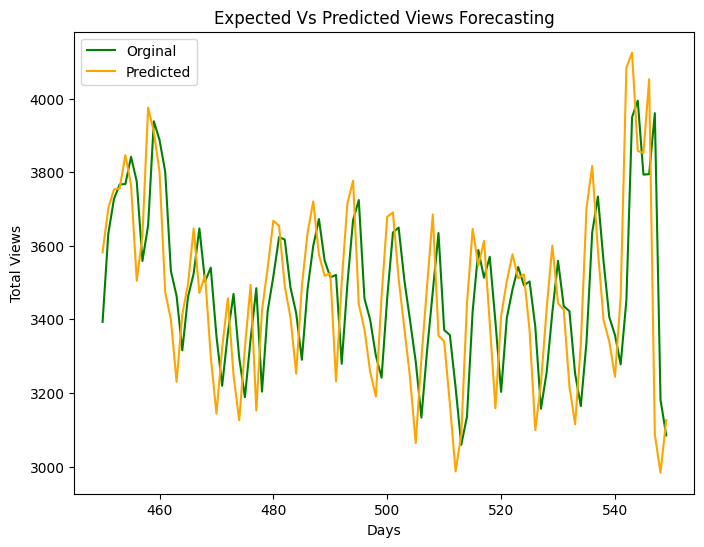

In [64]:
plt.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

In [65]:
x = 0
length = len(predictions)
for i in range(length):
  if((abs(predictions[i] - originals[i]) / originals[i] * 100) < 10):
    x+=1

accuracy = x / length

print(accuracy)

0.97


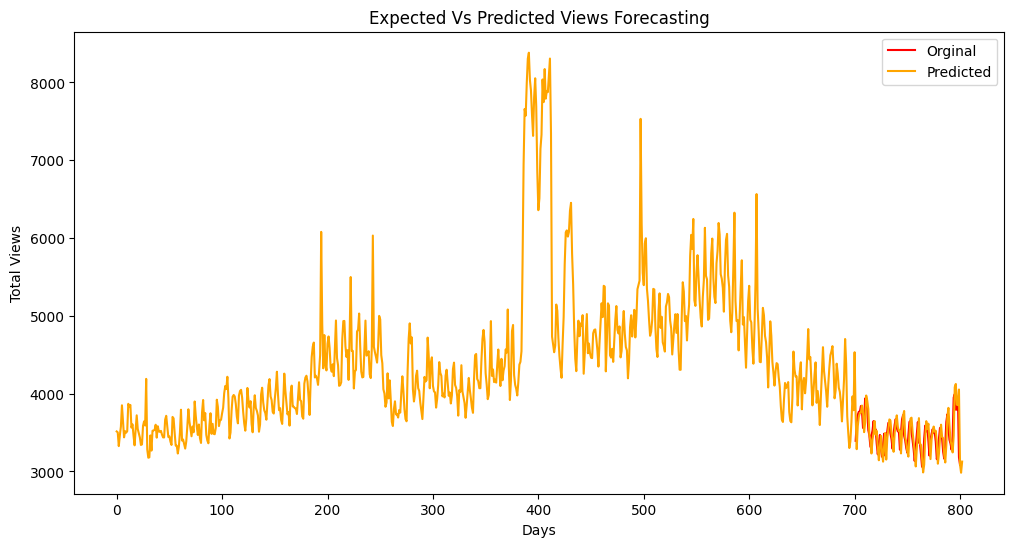

In [66]:
plt.figure(figsize=(12, 6))
test_day = [t+701
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'red')
plt.plot(days[0:804], total_view['en'], color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

In [67]:
npages = 5
top_pages = {}
key = 'en'
print(key)
sum_set = pd.DataFrame(language_collection[key][['Page']])
sum_set['total'] = language_collection[key].sum(axis=1)
sum_set = sum_set.sort_values('total',ascending=False)
print(sum_set.head(5))
top_pages[key] = sum_set.index[0]
print('\n')

en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.719626e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  1.292035e+10
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.838849e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.900465e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.403199e+09




<ipython-input-67-eaef1ee5c11b>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_set['total'] = language_collection[key].sum(axis=1)


In [68]:
print('Accuracy : ', accuracy * 100, '%')

Accuracy :  97.0 %
